### MINIMAL EXAMPLE OF JUPYTER NOTEBOOK WHICH CAN BE RUN WITH CROMWELL

### IMPORT NECESSARY MODULES

In [15]:
import os
import sys
import json
import numpy as np

In [16]:
%matplotlib inline  
#%matplotlib notebook
import matplotlib.pyplot as plt

## Notebook expects a file "parameters.json" in the execution directory
Cromwell will localize it here

In [17]:
with open("parameters.json", 'rb') as f:
    params = json.load(f)
print(params)

{'wdl.alias': 'disk_shading_yes_bg', 'wdl.memo': 'geco, inactive kl_logit', 'wdl.file_train': 'gs://ld-data-bucket/data/fashionmnist_train.pkl', 'wdl.file_test': 'gs://ld-data-bucket/data/fashionmnist_test.pkl', 'wdl.file_ckpt': 'gs://ld-results-bucket/ckpt/dummy.pkl', 'wdl.bucket_output': 'gs://ld-results-bucket', 'wdl.dir_output': 'trial_v1', 'wdl.notebook_name': 'fashion_mnist_vae.ipynb', 'wdl.git_repo': 'https://github.com/dalessioluca/fashion_mnist_vae.git', 'wdl.commit_or_branch': 'master', 'simulation': {'__comment': 'there are 3 types of runs: scratch, resume, pre_trained', 'type': 'scratch'}, 'architecture': {'__comment': 'parameters specifying the architecture of the model', 'dim_zwhat': 25, 'width_input_image': 28, 'ch_input_image': 1}, 'loss': {'__comment': 'parameter of the observation model', 'mse_sigma': 0.1}, 'optimizer': {'__comment': 'which optimizer to use', 'type': 'adam', 'lr': 0.001, 'betas': [0.9, 0.999], 'eps': 1e-08}, 'training': {'__comment': 'parameter of the

## Read train, test ahd checkpoint file. Also prepare output directory

In [18]:
# CROMWELL will localize the train, test and checkpoint file into the execution_dir
# gs://ld-data-bucket/data/fashionmnist_train.pkl -> execution_dir/fashionmnist_train.pkl
# Therefore I just need to remove everything except the name since everything is relative to exectution directory

train_file = os.path.basename(params["wdl.file_train"])
test_file = os.path.basename(params["wdl.file_test"])
ckpt_file = os.path.basename(params["wdl.file_ckpt"])
dir_output = params["wdl.dir_output"]


# create output directionry if it does nto exists
try:
    os.mkdir(dir_output)
except FileExistsError:
    pass

# Save input_json_file to output dir
json_param_file = os.path.join(dir_output, "parameters.json")
with open(json_param_file, 'w') as f:
    json.dump(params, f)
    
# checks
#assert os.path.isfile(train_file)
#assert os.path.isfile(test_file)
#assert os.path.isfile(ckpt_file)
    
print(train_file)
print(test_file)
print(dir_output)
print(json_param_file)

fashionmnist_train.pkl
fashionmnist_test.pkl
trial_v1
trial_v1/parameters.json


# Your code here
load data, train, plot results

### Make some nice plots and save them in output dir 

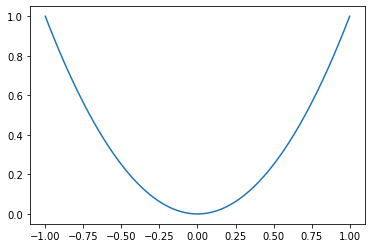

In [19]:
x = np.linspace(-1,1,100)
y = x**2
plt.plot(x,y)

result1 = os.path.join(dir_output, "results.png")
plt.savefig(result1, bbox_inches='tight') 